## Uždavinys 1

Naudodami krūties vėžio duomenų rinkinį, prognozuokite, ar navikas yra gerybinis ar piktybinis, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


tikslumas 0.951048951048951
[[91  3]
 [ 4 45]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        94
           1       0.94      0.92      0.93        49

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

[0.         0.         0.         0.0106383  0.0106383  0.0212766
 0.0212766  0.04255319 0.04255319 0.12765957 0.12765957 0.29787234
 0.29787234 1.        ]


c:\Users\edita\Documents\KURSAI\240319DMO492DIE\mokymai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


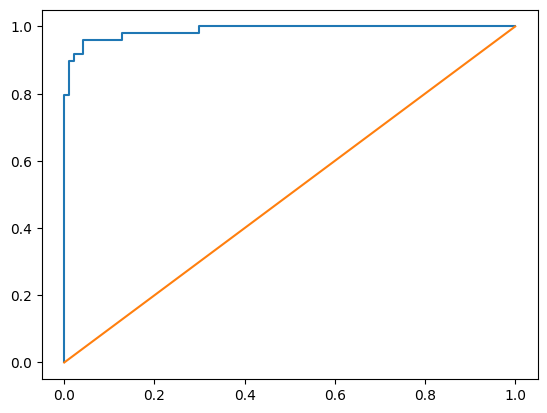

In [34]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('data.csv')

data = data.drop(['id', 'Unnamed: 32'], axis=1)
# diagnozes paverčiame 1, jei piktybisnis(M), 0 - jei gerybinis(B)
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
# data 

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
# print(f"X-o reikšmė {X}")
# print(f"y-o reikšmė {y}")
 
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

accuracy = accuracy_score(y_pred, y_test)
# print(y_prob)
print(f"tikslumas {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

classif_report = classification_report(y_test, y_pred)
print(classif_report)
# modelio patikimumo vertinimas 
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
print(fpr)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train)
# print('_____________')
# print(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(max_iter=10000)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(f"tikslumas {accuracy}")

tikslumas 0.958041958041958



## Uždavinys 2

Naudojant širdies ligų duomenų rinkinį, prognozuokite, ar pacientas turi širdies ligą, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys https://archive.ics.uci.edu/dataset/45/heart+disease


In [63]:
from sklearn.preprocessing import PolynomialFeatures
column_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df = pd.read_csv('heart+disease/reprocessed.hungarian.data.csv', sep=' ', names= column_names)
X = df.drop('num', axis=1)
y = df['num']
df=df.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(y.values)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_poly, y_train)
y_pred = log_reg.predict(X_test_poly)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')




[ 0.  1.  0.  3.  0.  0.  0.  0.  1.  0.  0.  3.  0.  3.  0.  0.  1.  0.
  1.  1.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  3.  0.  1.  3.  0.  0.
  1.  0.  0.  0.  0.  4.  0.  0.  3.  0.  0.  0.  0.  1.  2.  4.  0.  0.
  0.  0.  1.  1.  0.  3.  0.  0.  0.  1.  0.  0.  0.  0.  3.  0.  1.  0.
  2.  0.  2.  0.  2.  0.  0.  1.  0.  0.  1.  0.  2.  3.  3.  0.  2.  0.
  0.  0.  0.  2.  0.  2.  0.  0.  0.  0.  4.  0.  2.  1.  1.  0.  0.  0.
  0.  0.  0.  2.  0.  0.  0.  1.  1.  1.  0.  1.  3.  0.  0.  4.  0.  0.
  0.  0.  0.  0.  0.  1.  3.  3.  0.  1.  0.  0.  2.  1.  4.  4.  4.  0.
  3.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  4.  2.  0.  3.  0.  3.  4.
  0.  0.  0.  0.  3.  4.  0.  0.  0.  0.  0.  0.  0.  4.  4.  3.  0.  0.
  0.  1.  0.  3.  0.  0.  2.  0.  1.  0.  3.  0.  0.  0.  0.  0.  0.  0.
  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.
  0.  2.  0.  0.  0.  2.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  4.  3.  2.  2.  0.  2.  3.  0.  1.  0

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Uždavinys 3

Naudojant Pima Indians Diabetes duomenų rinkinį, prognozuokite, ar pacientas turi diabetą, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: Pima Indians Diabetes Database https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

In [23]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('diabetes.csv')
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.78125
[[113   9]
 [ 33  37]]
0.78125
[[111  11]
 [ 31  39]]


c:\Users\edita\Documents\KURSAI\240319DMO492DIE\mokymai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
data = pd.read_csv('diabetes.csv', sep=',')
data

X = data.drop('Outcome', axis=1)
# print(X)
y = data['Outcome']
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Uždavinys 4

Naudojant kraujo donorystės duomenų rinkinį, prognozuokite, ar donoras atliks kraujo donorystę, naudodami logistinės regresijos modelį su polinominėmis ypatybėmis.

Duomenų rinkinys: [Blood Transfusion Service Center Data Set](https://archive.ics.uci.edu/dataset/176/blood+transfusion+service+center)

In [66]:
from IPython.display import HTML, display

data = pd.read_csv('blood+transfusion+service+center/transfusion.data')
data_columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LogisticRegression(max_iter=int(1e10))

# NoPoly
model.fit(X_train, y_train)
evaluate_model(X_train, X_test, y_train, y_test, model, "No PolynomialFeautures: ")

# Poly
model.fit()